## EDA & Data Viz

### Load Required Libraries

In [1]:
from __future__ import print_function, division

In [2]:
#import requests
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load cleaned (pickled) data 

In [4]:
# cw stands for combined wine
with open('./combo_wines_cleaned.pickle', 'rb') as read_file:
    cwraw = pickle.load(read_file)

In [5]:
cwraw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
index                                                                 
0                7.4              0.70         0.00             1.9   
1                7.8              0.88         0.00             2.6   
2                7.8              0.76         0.04             2.3   
3               11.2              0.28         0.56             1.9   
4                7.4              0.70         0.00             1.9   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
index                                                                        
0          0.076                 11.0                  34.0   0.9978  3.51   
1          0.098                 25.0                  67.0   0.9968  3.20   
2          0.092                 15.0                  54.0   0.9970  3.26   
3          0.075                 17.0                  60.0   0.9980  3.16   
4          0.076                 11.0                  34.0   0.9978  3.51   

       sulphates  alcohol  quality  redness  class  
index                                               
0           0.56      9.4        5        1      0  
1           0.68      9.8        5        1      0  
2           0.65      9.8        5        1      0  
3           0.58      9.8        6        1      0  
4           0.56      9.4        5        1      0

### Make sure to have an unadulterated copy of the data

In [6]:
#Remember, should always have an unadulterated copy. In this case named cwraw.
#create a working copy. For simplicity calling it (cw) 
#remember .copy() is for a deep copy
cw = cwraw.copy()

In [7]:
#check for null values
null_counts = cwraw.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [8]:
cw.shape

(6497, 14)

In [9]:
cw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
redness                 6497 non-null int64
class                   6497 non-null int64
dtypes: float64(11), int64(3)
memory usage: 761.4 KB


In [10]:
cw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality      redness  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      3.218501     0.531268    10.491801     5.818378     0.246114   
std       0.160787     0.148806     1.192712     0.873255     0.430779   
min       2.720000     0.220000     8.000000     3.000000     0.000000   
25%       3.110000     0.430000     9.500000     5.000000     0.000000   
50%       3.210000     0.510000    10.300000     6.000000     0.000000   
75%       3.320000     0.600000    11.300000     6.000000     0.000000   
max       4.010000     2.000000    14.900000     9.000000     1.000000   

             class  
count  6497.000000  
mean      0.196552  
std       0.397421  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

#### DataViz

In [11]:
# Categorize the Wine quality

cw.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
#Quality will be the target.
#Those wines rated 7, 8 and 9 are the Premium wine class.  All else are Modest.
#Aproximately 20% of the observation will be in the Premium class

(1079+193+5)/6497

0.19655225488687086

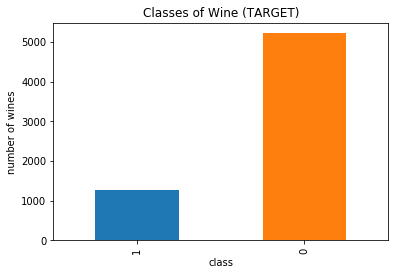

In [33]:
# Visualize the wine class

cw['class'].value_counts().sort_values().plot(kind='bar')
plt.title('Classes of Wine (TARGET)')
plt.xlabel('class')
plt.ylabel('number of wines');

### Deeper dive into the data
Is there colinearity between features?

In [13]:
#Find median and mean of entire dataset
qmed=np.median(cw.quality)
qmean=np.mean(cw.quality)
print("quality median =",qmed," quality mean =",qmean)

quality median = 6.0  quality mean = 5.818377712790519


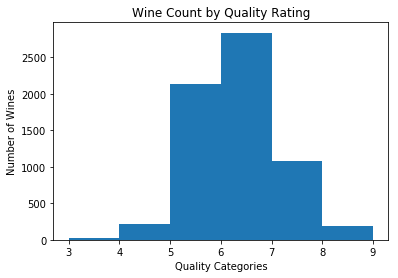

In [37]:
unique_qualities=sorted(cw.quality)
plt.hist(cw.quality,bins=unique_qualities)
# Add title and axis names
plt.title('Wine Count by Quality Rating')
plt.xlabel('Quality Categories')
plt.ylabel('Number of Wines');


/Users/mariascott/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mariascott/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


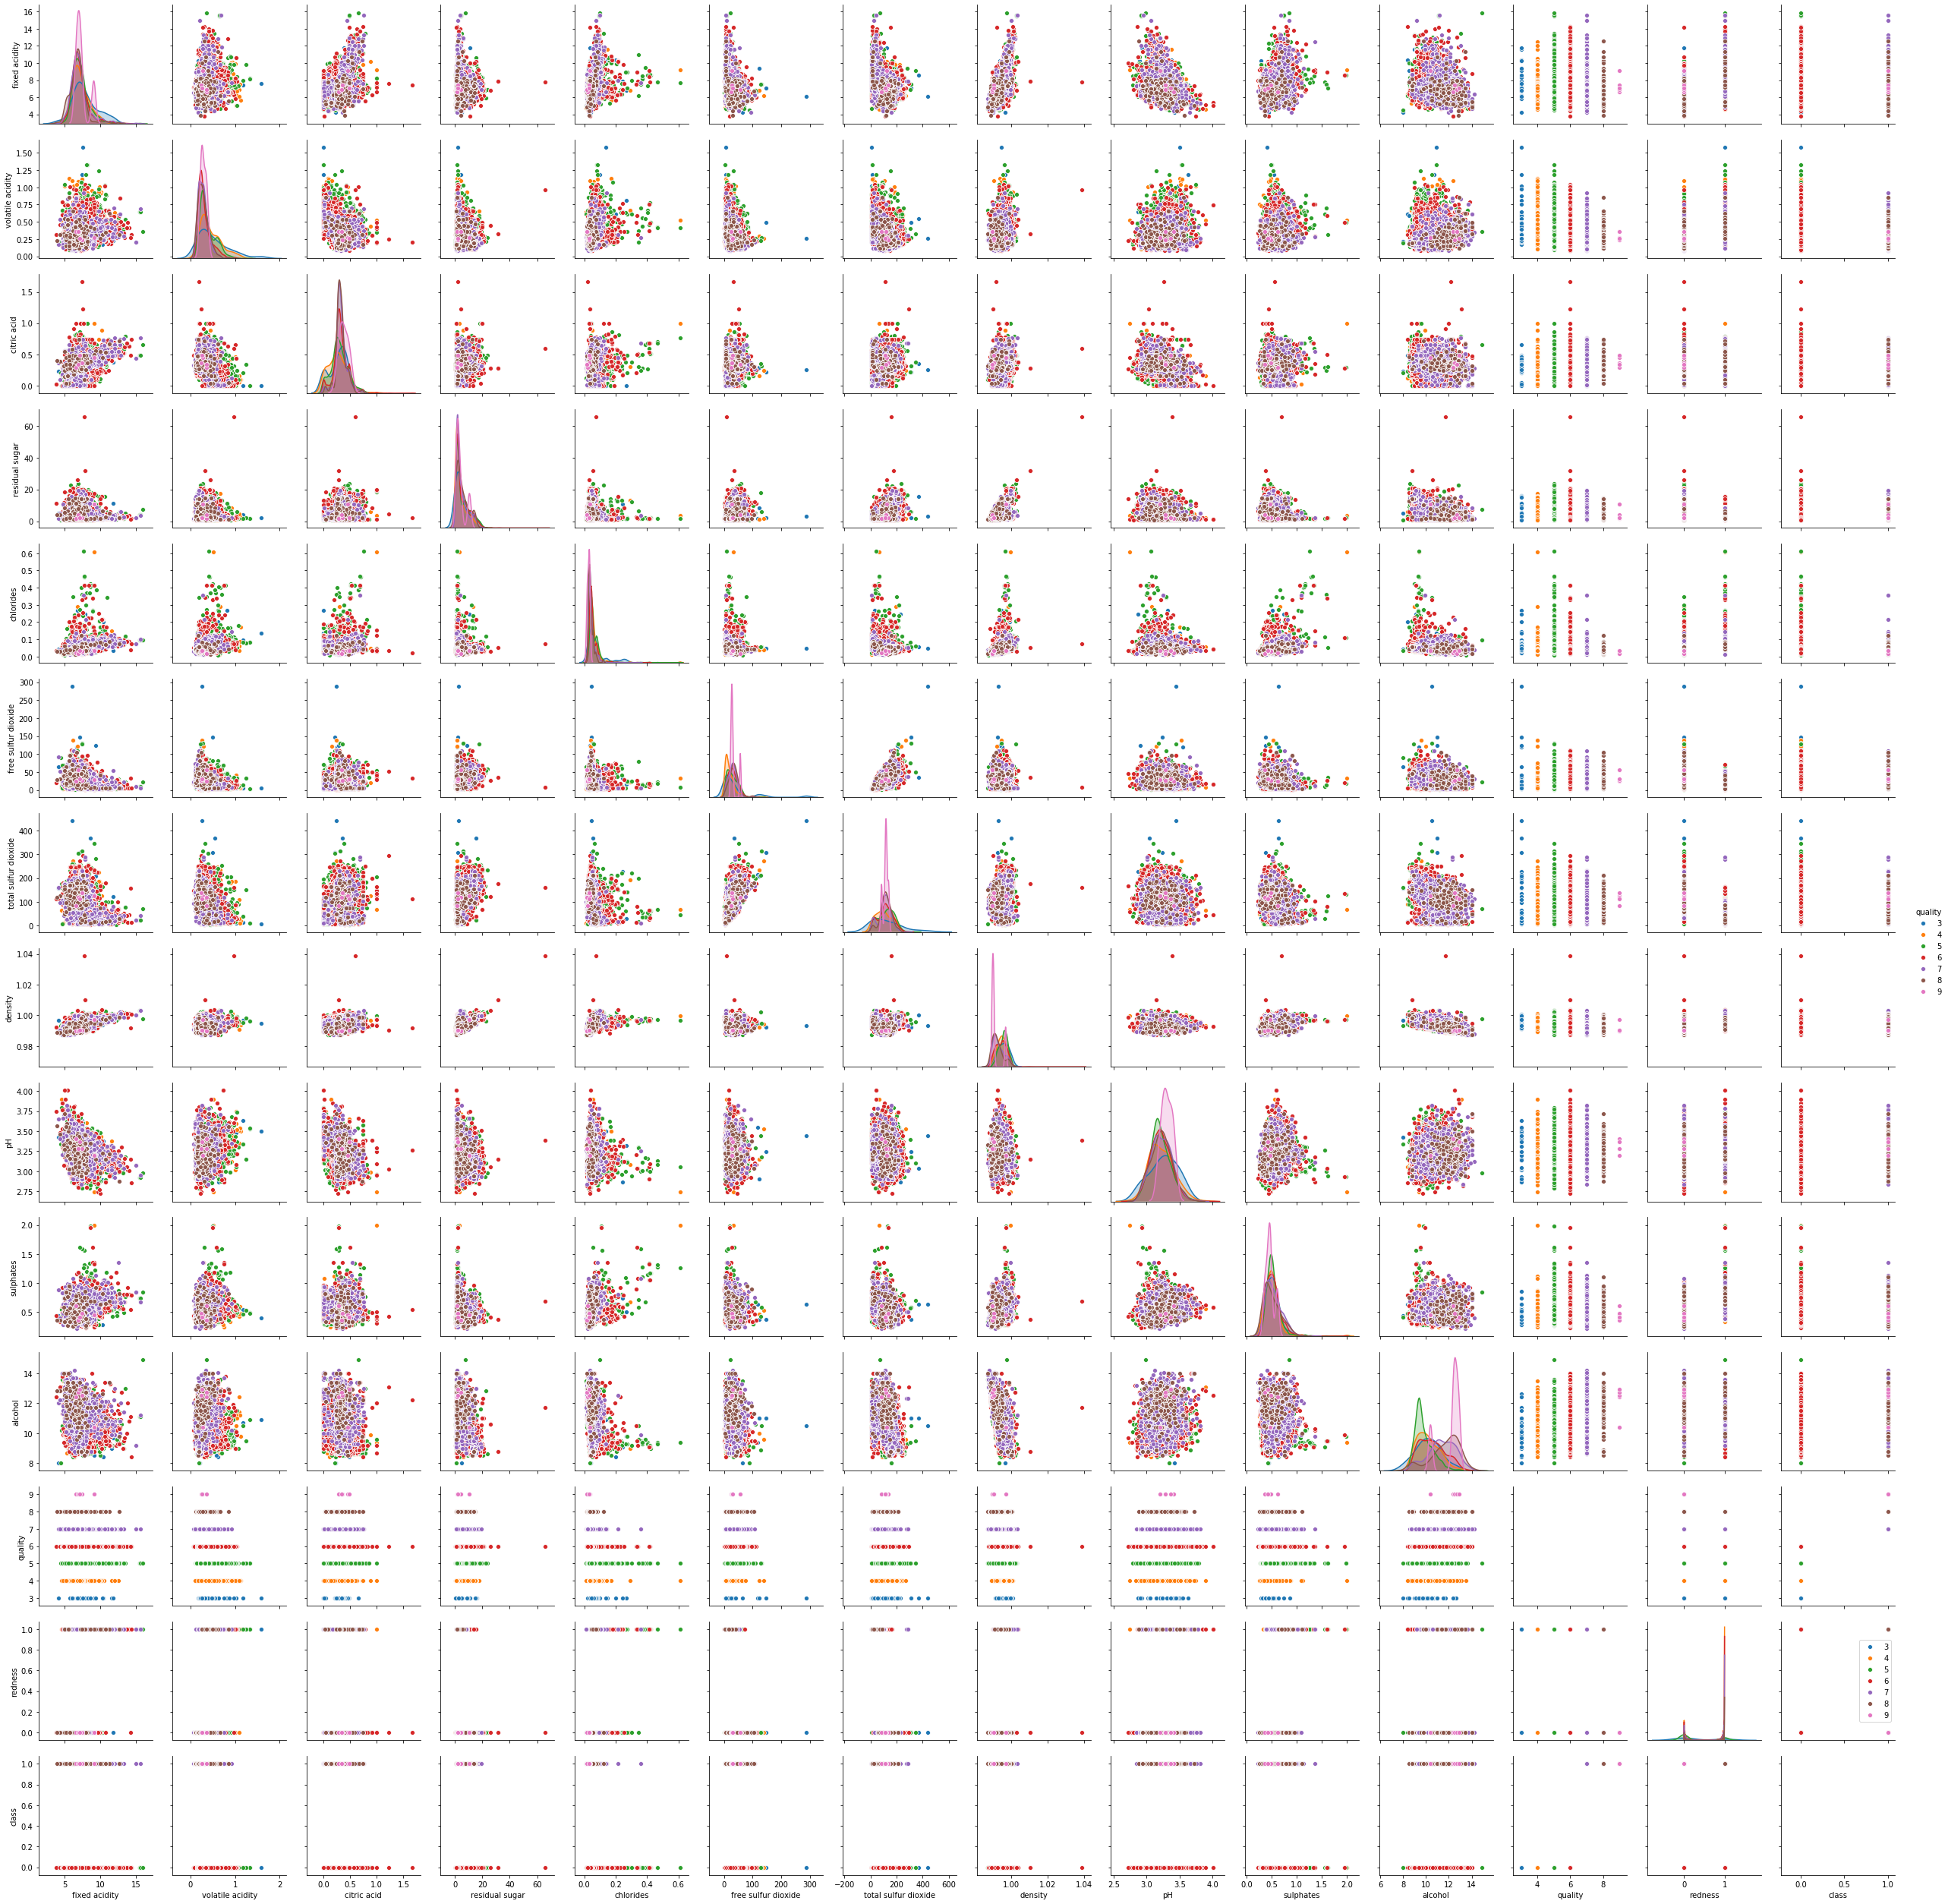

In [14]:
g = sns.pairplot(cw, hue="quality")
plt.legend();

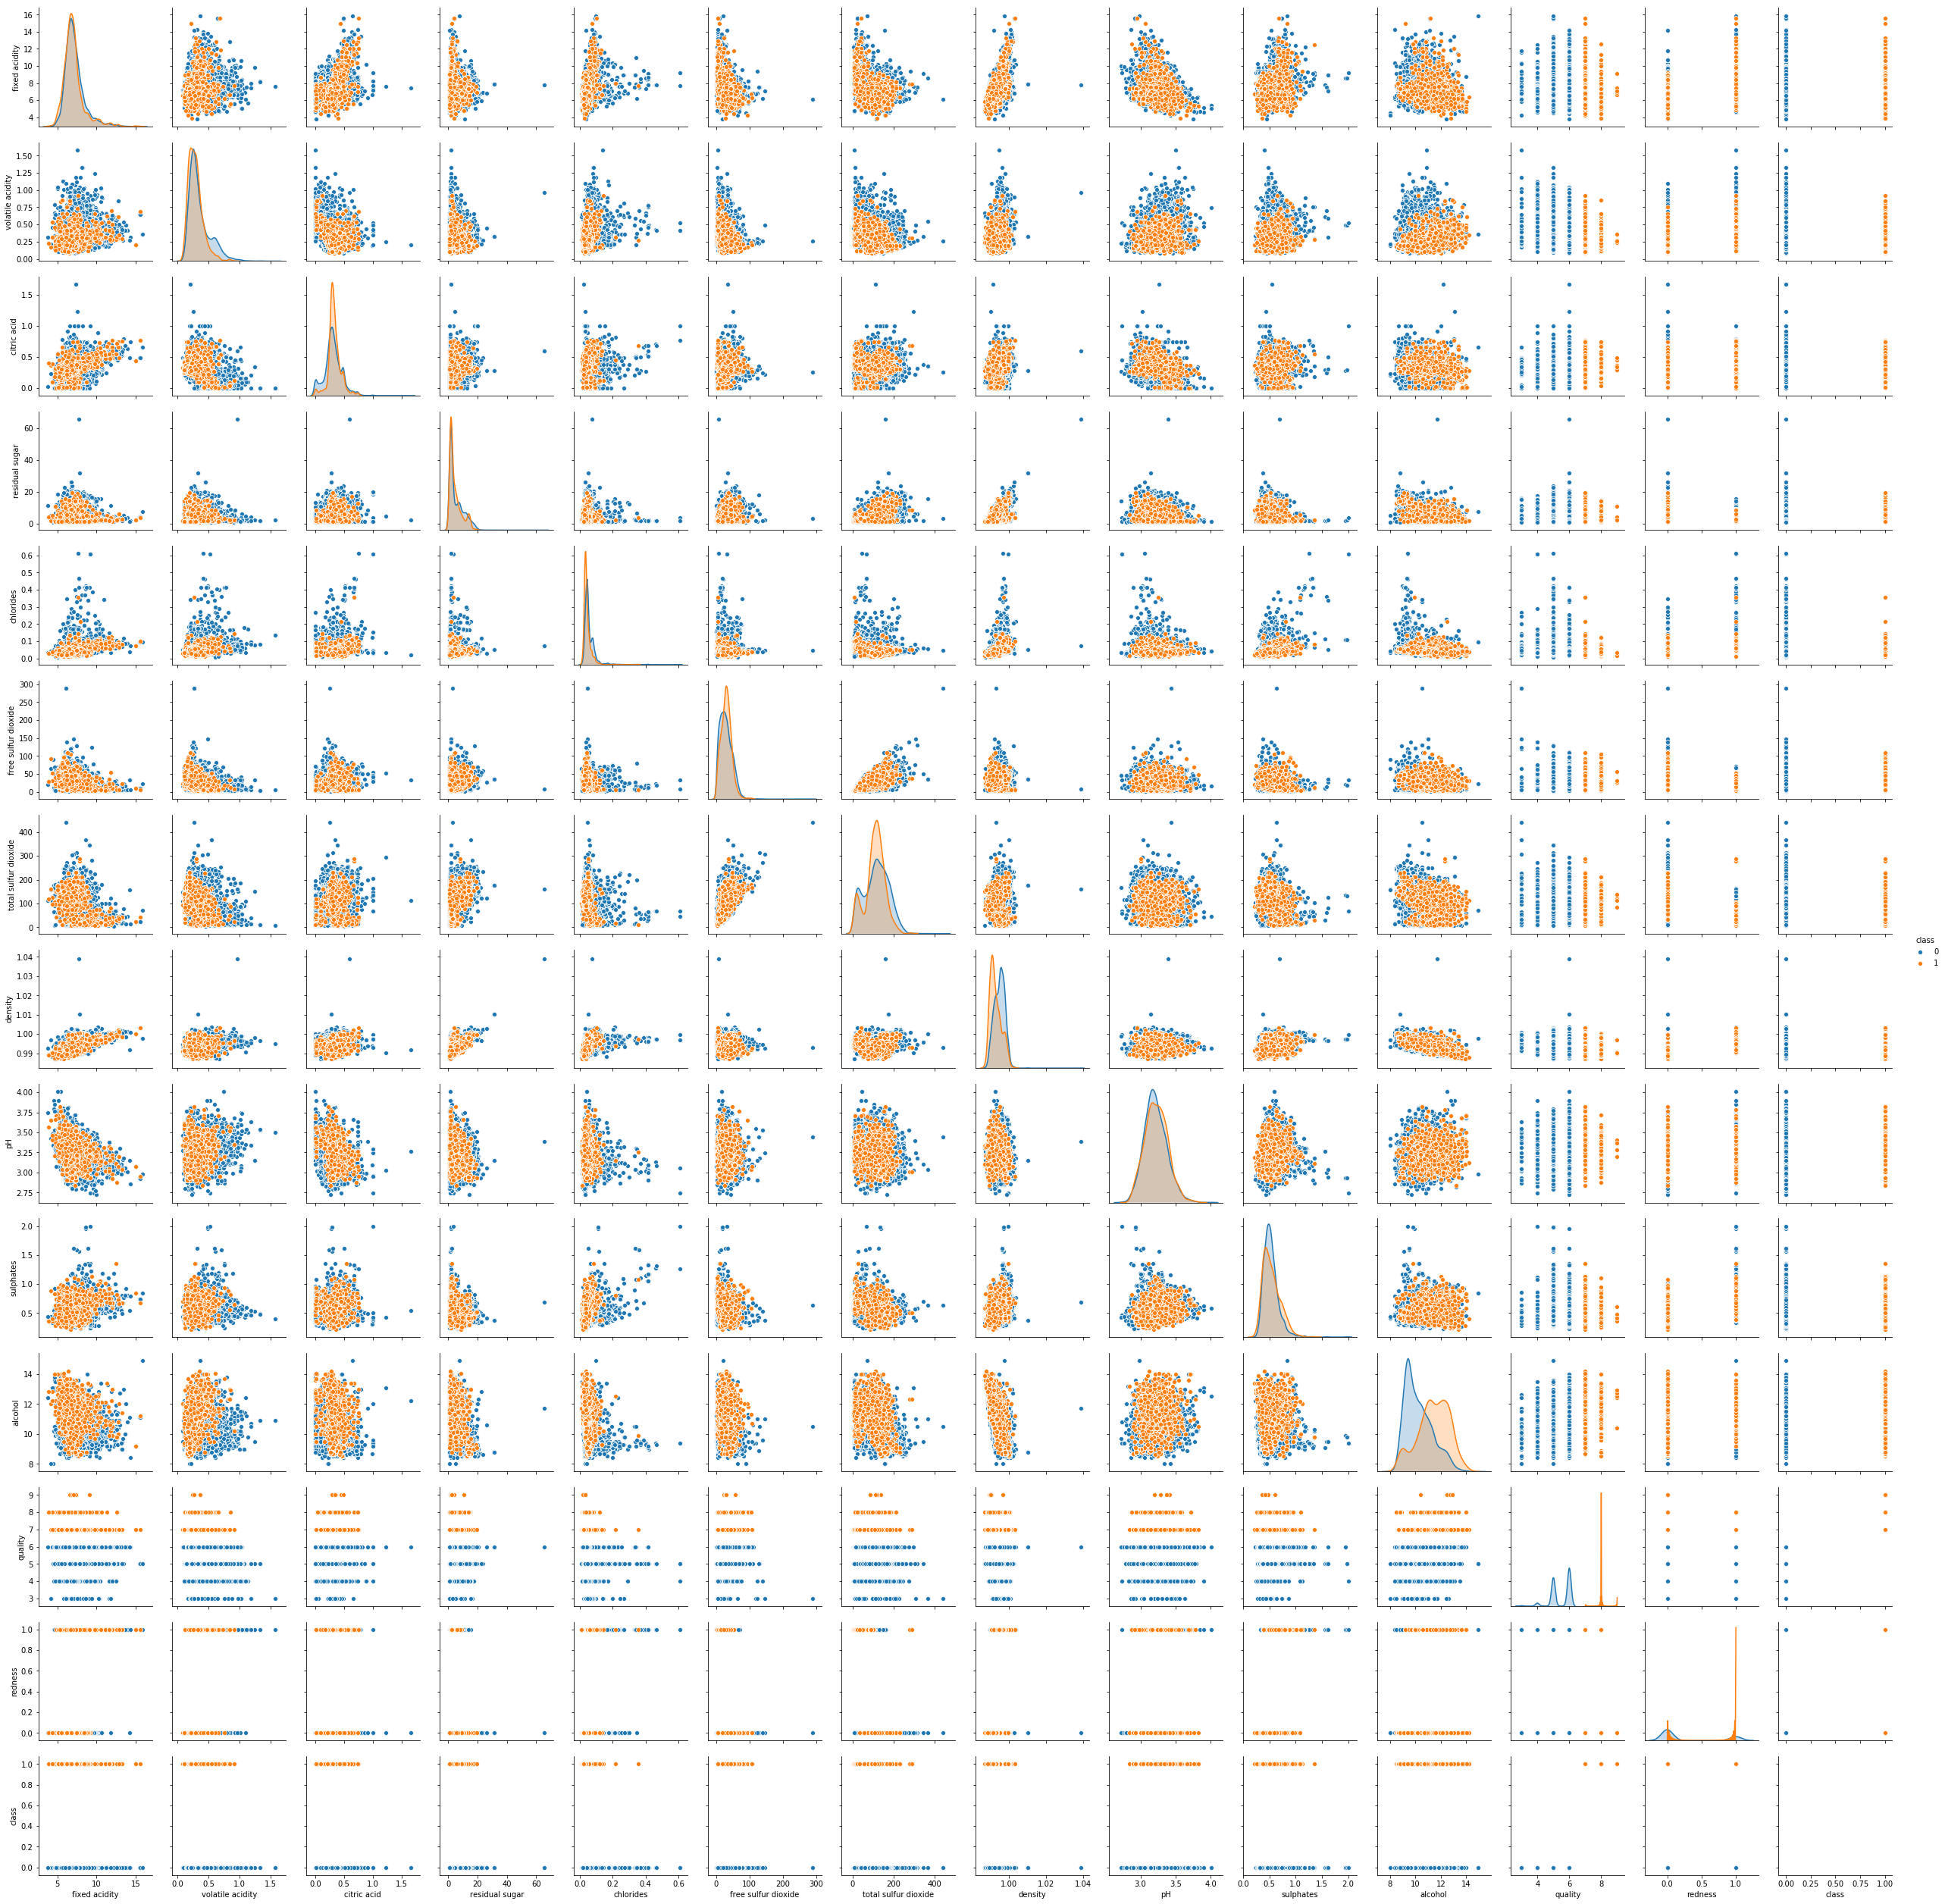

In [40]:
g = sns.pairplot(cw, hue="class")

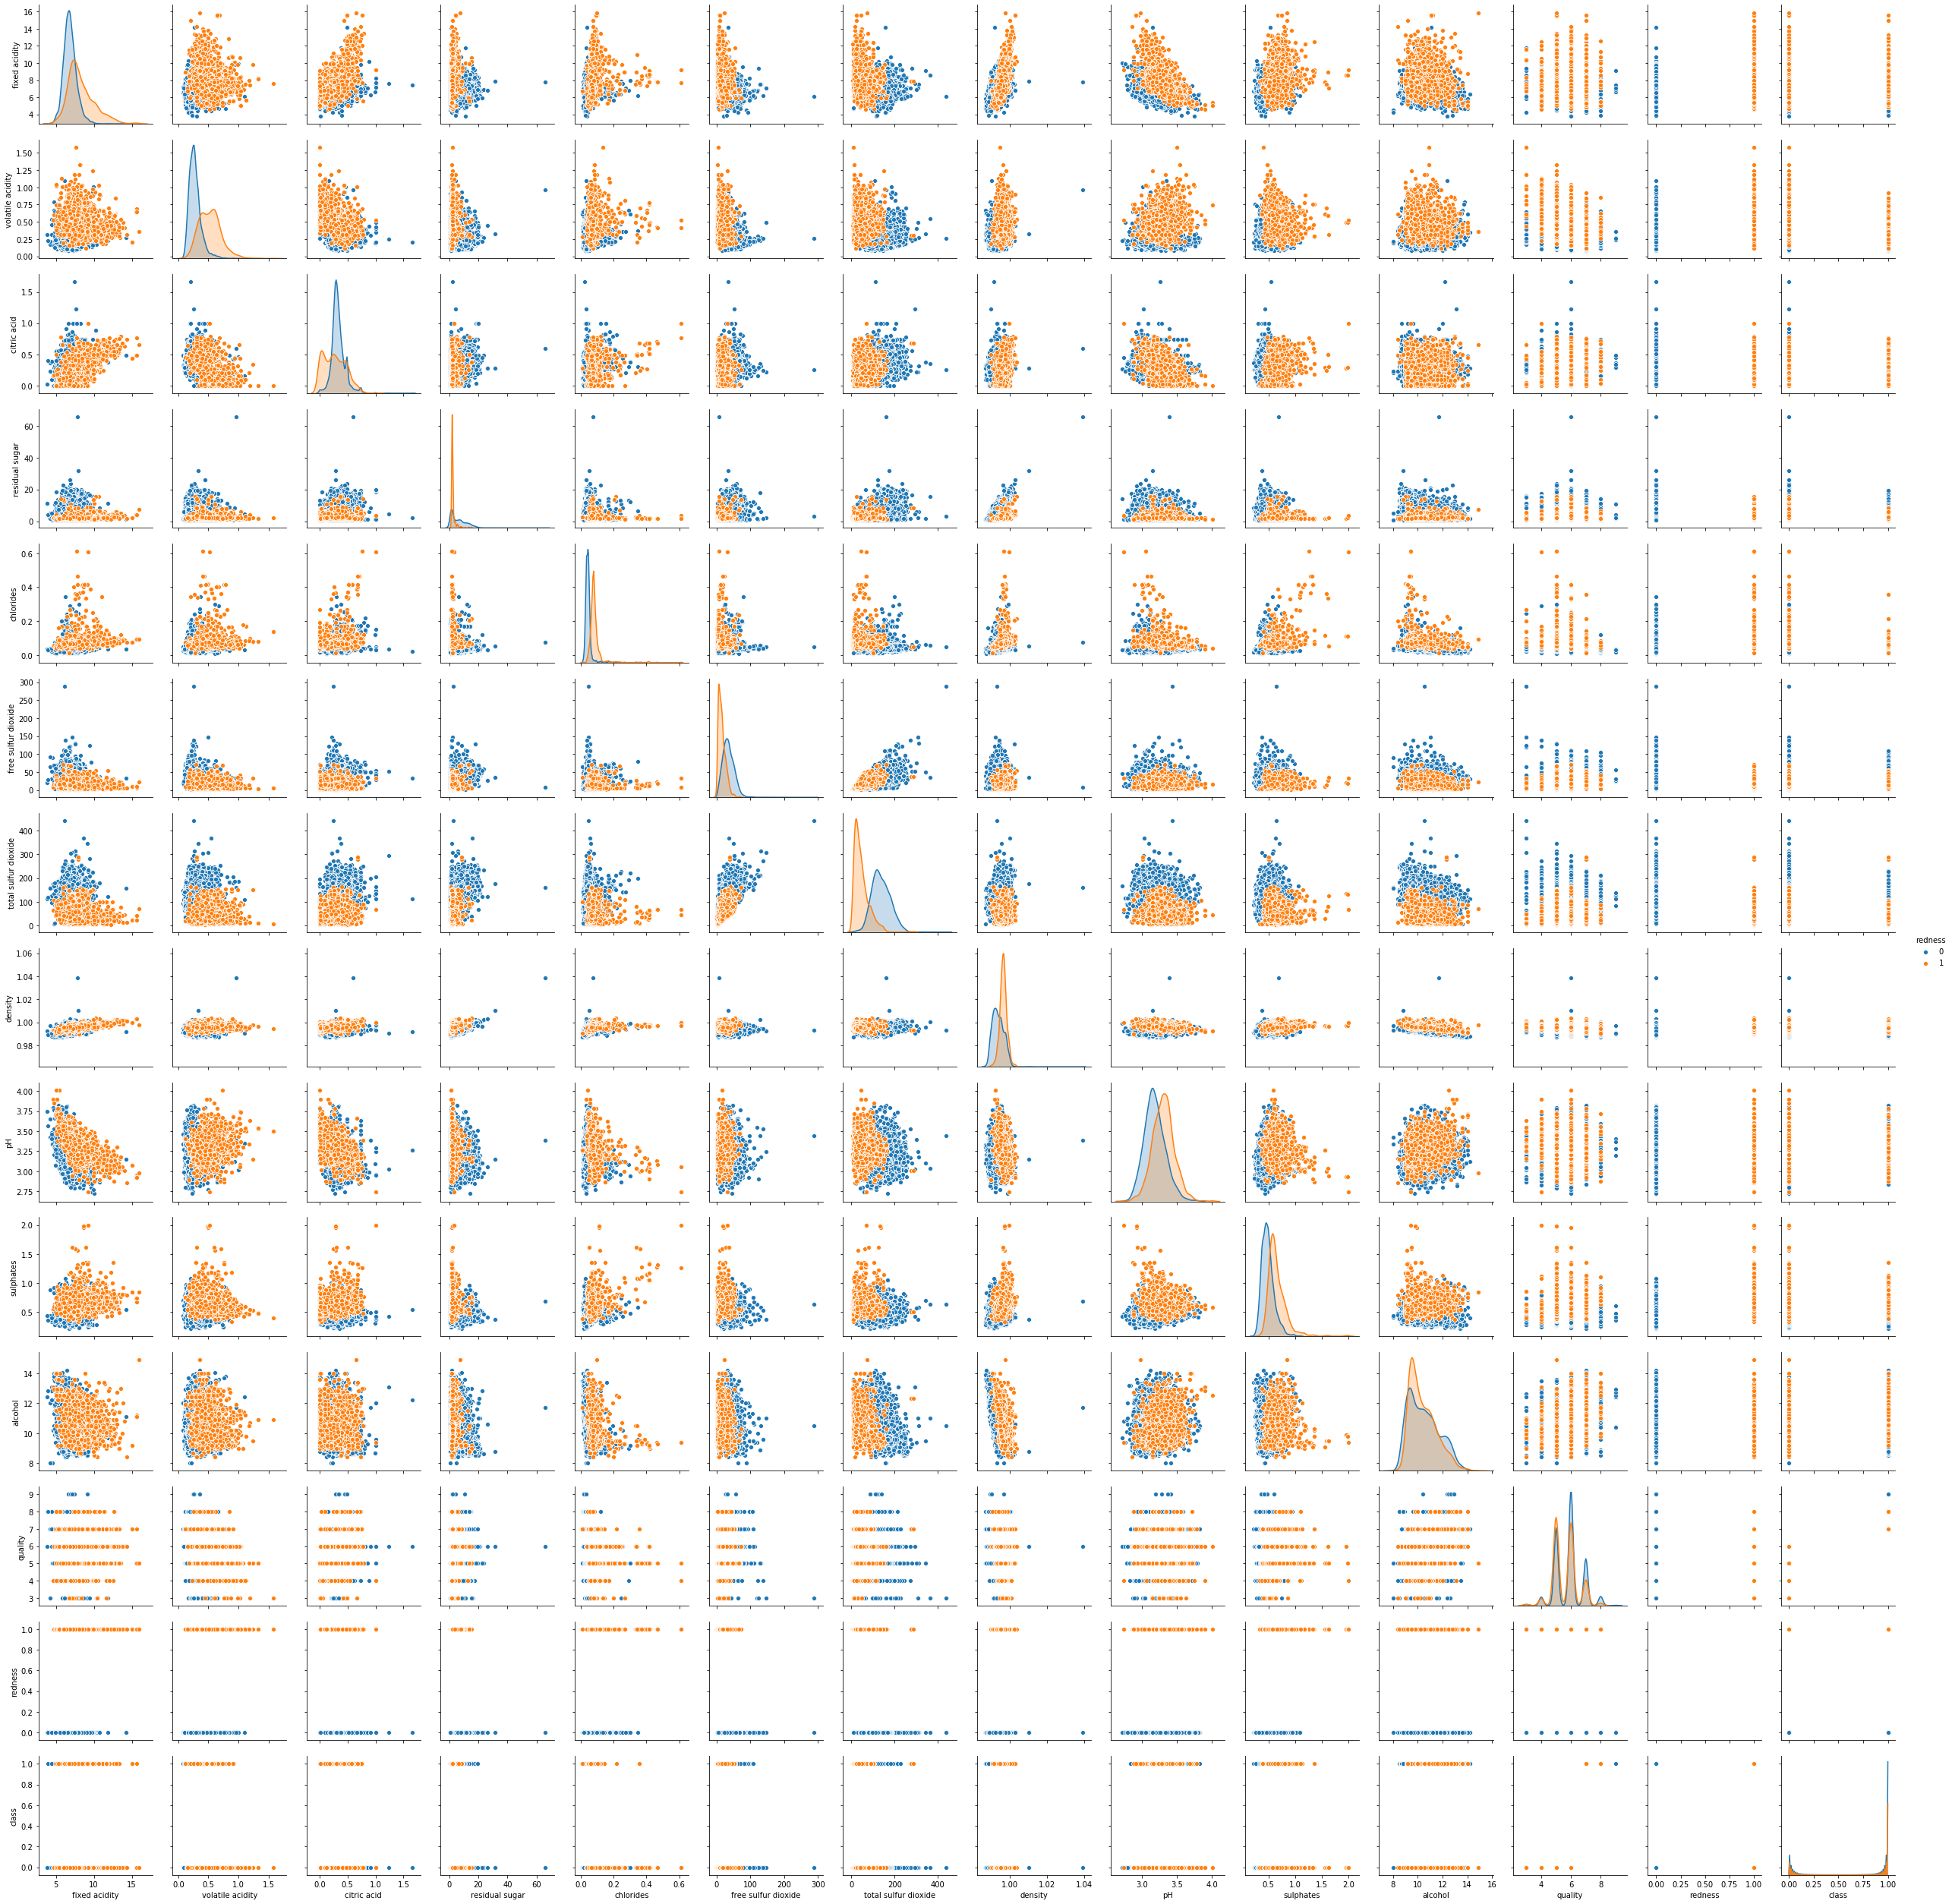

In [15]:
g = sns.pairplot(cw, hue="redness")

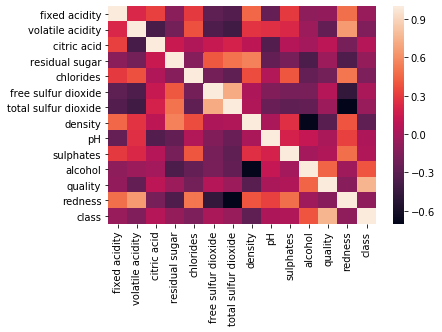

In [16]:
sns.heatmap(cw.corr())

In [17]:
cw.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
redness                    0.486740          0.653036    -0.187397   
class                     -0.049447         -0.151714     0.054444   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
redness                    -0.348821   0.512678            -0.471644   
class                      -0.063992  -0.161781             0.014767   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
redness                          -0.700357  0.390645  0.329129   0.487218   
class                            -0.051226 -0.275441  0.028149   0.033971   

                       alcohol   quality   redness     class  
fixed acidity        -0.095452 -0.076743  0.486740 -0.049447  
volatile acidity     -0.037640 -0.265699  0.653036 -0.151714  
citric acid          -0.010493  0.085532 -0.187397  0.054444  
residual sugar       -0.359415 -0.036980 -0.348821 -0.063992  
chlorides            -0.256916 -0.200666  0.512678 -0.161781  
free sulfur dioxide  -0.179838  0.055463 -0.471644  0.014767  
total sulfur dioxide -0.265740 -0.041385 -0.700357 -0.051226  
density              -0.686745 -0.305858  0.390645 -0.275441  
pH                    0.121248  0.019506  0.329129  0.028149  
sulphates            -0.003029  0.038485  0.487218  0.033971  
alcohol               1.000000  0.444319 

### Note for later :
    
    .653036 fairly high correlationbetween red and acidity
    -.700357 total sulfur and redness
    
    Things to Try:
        
        Redness & Premiumness
QThresh
Cross Val & Regularization
LR
KNN
Nay Bay
SVM
DT
RF
NeuroNet